In [1]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data_paths = glob('../dataset/cifar/train/*.png')
path = data_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

In [7]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

TensorShape([32, 32, 3])

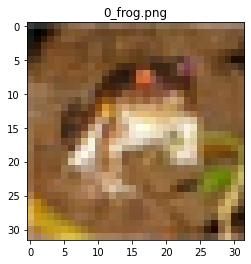

In [10]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

### tf.data

In [11]:
data_paths[:3]

['../dataset/cifar/train\\0_frog.png',
 '../dataset/cifar/train\\10000_automobile.png',
 '../dataset/cifar/train\\10001_frog.png']

In [34]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [35]:
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

(32, 32, 3)


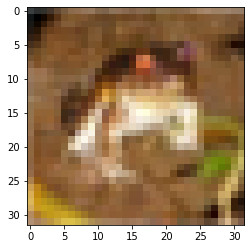

In [36]:
tf_image = next(iter(dataset))
print(tf_image.shape)

plt.imshow(tf_image)
plt.show()

### Batch로 묶기

In [37]:
batch_size = 16

dataset = dataset.batch(batch_size)

tf_image = next(iter(dataset))
tf_image.shape

TensorShape([16, 32, 32, 3])

### Shuffle

(16, 32, 32, 3)


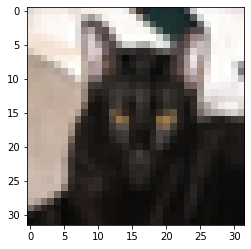

In [39]:
dataset = dataset.shuffle(buffer_size=len(data_paths))

tf_image = next(iter(dataset))
print(tf_image.shape)

plt.imshow(tf_image[0])
plt.show()

### Label하고 같이 넣기

In [45]:
def get_label(path):
    return path.split('_')[-1].replace('.png', '')

path, get_label(path)

('../dataset/cifar/train\\0_frog.png', 'frog')

In [55]:
label_names = [get_label(path) for path in data_paths]
class_names = np.unique(label_names)

len(label_names)

50000

In [56]:
def onehot_encoding(label):
    return np.array(class_names == label, np.uint8)

onehot_encoding('frog')

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [61]:
def read_image(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, label


dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

# epoch 1번 돌아가고 data가 없어지는 것을 방지
dataset = dataset.repeat()

(16, 32, 32, 3) (16,)


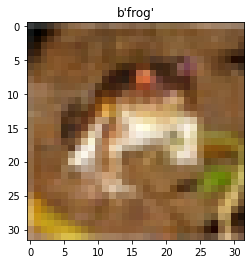

In [65]:
image, label = next(iter(dataset))
print(image.shape, label.shape)

plt.imshow(image[0])
plt.title(label[0].numpy())
plt.show()

### Tensorflow 함수로 label 얻기

In [73]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(cls_name == class_names, tf.uint8)
    return onehot_encoding

In [79]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    # read label
    fname = tf.strings.split('_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot_encoding = tf.cast(cls_name == class_names, tf.uint8)
    
    return image, onehot_encoding

dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image_label).batch(batch_size).repeat()